<a href="https://colab.research.google.com/github/vos32/Github/blob/main/%D0%9B%D1%805_%D0%86%D0%B2%D0%B0%D0%BD%D0%BE%D0%B2%D0%B0_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Була присутня на парі

Іванова Карина. Варіант 13

#Лабораторна робота 5
Розв'язання систем нелінійних рівнянь.

In [ ]:
import numpy as np

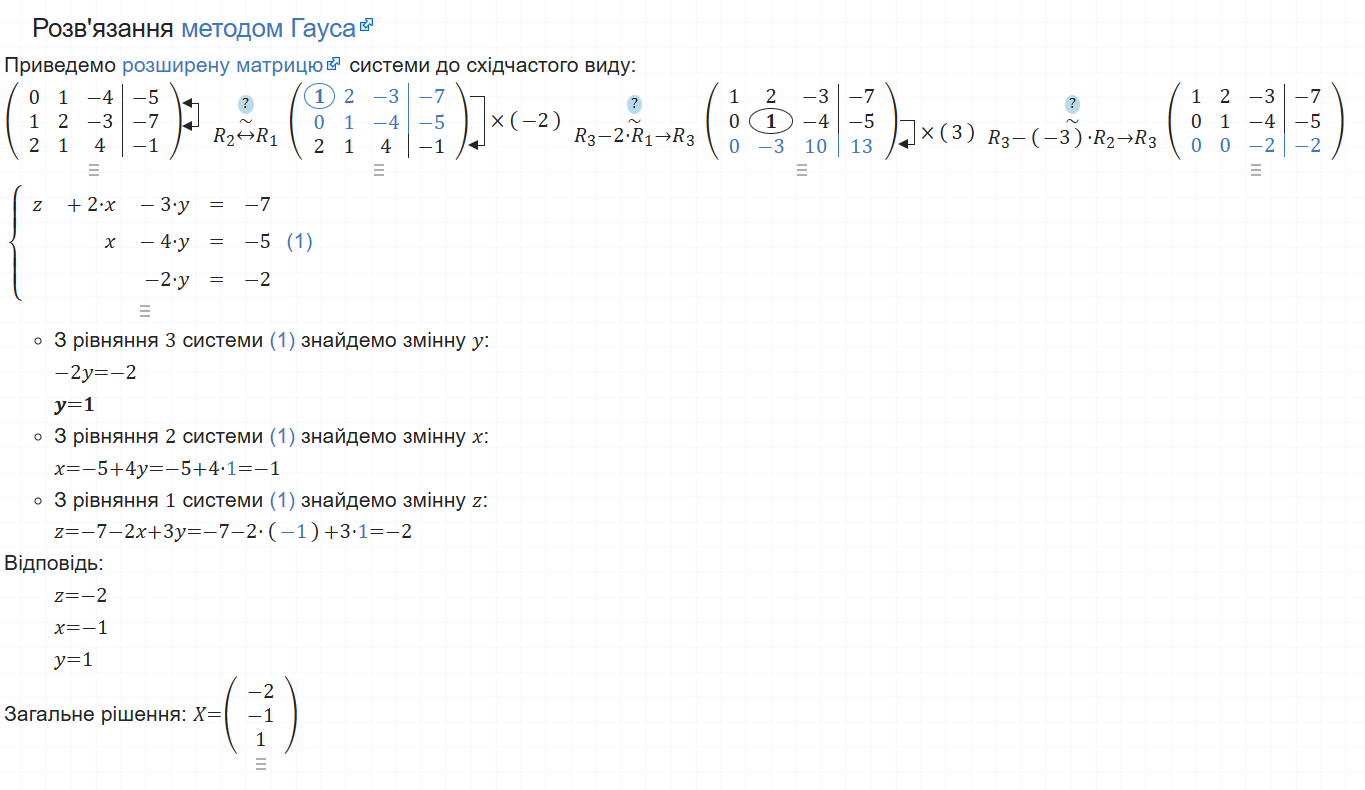

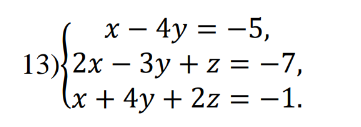

In [ ]:
a = np.array([
    [1, -4, 0],
    [2, -3, 1],
    [1, 4, 2],
])
b = np.array([[-5], [-7], [-1]])

In [ ]:
# Напиши функцію для вирішення системи методом Гауса
def solve_gausse(a, b, verbose=False):
    det = np.linalg.det(a)
    if verbose: print(f"Визначник матриці A: {round(det)}")
    if det == 0:
        print("Визначник дорівнює нулю - розв'язків немає")
        return None
    # Reading number of unknowns
    n = len(b)
    m = np.concatenate([a, b], axis=1, dtype=float)

    # Applying Gauss-Jordan Elimination
    for i in range(n):

        # Swap rows to avoid division by 0
        if m[i, i] == 0:
            for k in range(i+1, n):
                if m[k, k] != 0:
                    m[[i, k], :] = m[[k, i], :]
                    break


        if m[i, i] != 1:
            m[i, :] *= 1/m[i, i]

        for j in range(n):
            if i != j:
                ratio = m[j][i]/m[i][i]

                m[j, :] = m[j, :] - ratio * m[i, :]

    return m[:, [-1]]

print(f"Вектор рішення: \r\n {solve_gausse(a, b)}")

Вектор рішення: 
 [[-1.]
 [ 1.]
 [-2.]]


# **2 частина**

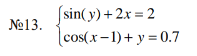

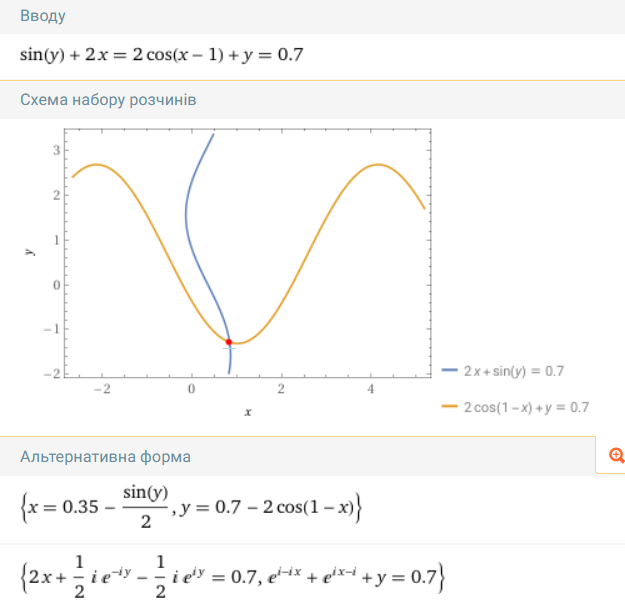

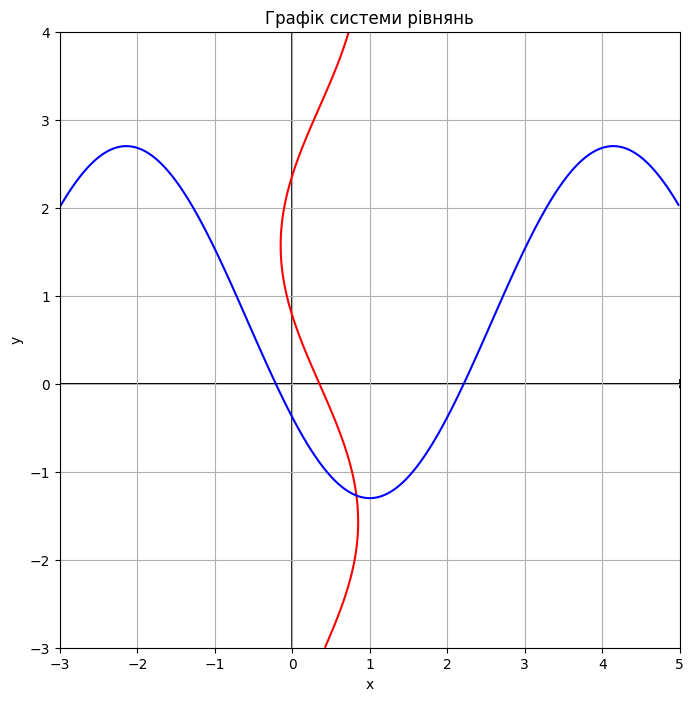

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Область значень для x та y
x_min, x_max = -3, 5
y_min, y_max = -3, 4
step = 0.01

# Створюємо масиви значень x та y
x, y = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# Рівняння системи
eq1 = 2*x + np.sin(y) - 0.7
eq2 = 2*np.cos(x - 1) + y - 0.7

# Створюємо графік
fig, ax = plt.subplots(figsize=(8, 8))

# Додаємо графік першого рівняння
ax.contour(x, y, eq1, levels=[0], colors='red')

# Додаємо графік другого рівняння
ax.contour(x, y, eq2, levels=[0], colors='blue')

# Налаштування графіка
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Графік системи рівнянь')

# Додаємо стрілки на кінцях осей
ax.arrow(x_min, 0, x_max - x_min, 0, head_width=0.1, head_length=0.05, fc='black', ec='black')
ax.arrow(0, y_min, 0, y_max - y_min, head_width=0.1, head_length=0.2, fc='black', ec='black')

# Додаємо сітку
plt.grid(True)

# Показуємо графік
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Розв'язок системи рівнянь методом простої ітерації
import numpy as np
from scipy import optimize

x0, y0 = 0.5, -1.5

def f1(y):
    return (0.7 - np.sin(y)) / 2     # x = (0.7 - sin(y)) / 2
def f2(x):
    return 0.7 - 2 * np.cos(x - 1)   # y = 0.7 - 2*cos(x - 1)

#Перевірка методу на збіжність

def iter (x,y,e):
    xn = x
    yn = y
    xn1 = f1(y)
    yn1 = f2(x)
    n = 1
    while ((abs(xn1-xn)>=e) & (abs(yn1-yn) >=e)):
        xn = xn1
        yn = yn1
        yn1 = f2(x)
        xn1 = f1(yn)


        n += 1
    print ('Simple iteration:')
    print ('x=', xn, '\ny=',yn,'\nThe amount of iteration = ',n)

iter(x0,y0,0.0001)

def f3(x):
    return 2 * x[0] + np.sin(x[1]) - 0.7,  2 * np.cos(x[0] - 1) + x[1] - 0.7


s = optimize.root(f3, [0.,0.], method = 'hybr') #Перевірка розв*язку #Відповіді
#мають співпасти
print ('Chek',s.x)

Simple iteration:
x= 0.8487474933020271 
y= -1.0551651237807456 
The amount of iteration =  2
Chek [ 0.82760265 -1.27035269]


In [ ]:
#Розв'язок системи рівнянь методом простої ітерації
import numpy as np
from scipy import optimize

x0, y0 = 0.5, -1.5

def f1(y):
    return (0.7 - np.sin(y)) / 2     # x = (0.7 - sin(y)) / 2
def f2(x):
    return 0.7 - 2 * np.cos(x - 1)   # y = 0.7 - 2*cos(x - 1)

#Перевірка методу на збіжність

def iter (x,y,e):
    xn = x
    yn = y
    xn1 = f1(y)
    yn1 = f2(x)
    n = 1
    while ((abs(xn1-xn)>=e) & (abs(yn1-yn) >=e)):
        xn = xn1
        yn = yn1
        yn1 = f2(x)
        xn1 = f1(yn)
        yn1 = f2(xn)

        n += 1
    print ('Simple iteration:')
    print ('x=', xn, '\ny=',yn,'\nThe amount of iteration = ',n)

iter(x0,y0,0.0001)

def f3(x):
    return 2 * x[0] + np.sin(x[1]) - 0.7,  2 * np.cos(x[0] - 1) + x[1] - 0.7


s = optimize.root(f3, [0.,0.], method = 'hybr') #Перевірка розв*язку #Відповіді
#мають співпасти
print ('Chek',s.x)

Simple iteration:
x= 0.827475078904505 
y= -1.270369996046292 
The amount of iteration =  7
Chek [ 0.82760265 -1.27035269]


Зверніть увагу!
#Відповіді мають співпасти.

